<h1 align="center">Laboratorio: <span style="font-weight:normal">Eliminación de anomalías de la Imagen (Filtro de la Mediana)</span></h1>

In [1]:
from PIL import Image, ImageFilter

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Filtro_Mediana(imagen_path, tamanio_filtro):
    # Carga la imagen para procesar
    imagen_original = Image.open(imagen_path)
    imagen_en_grises = np.array(imagen_original.convert("L"))

    array_temporal = []
    indice = tamanio_filtro // 2

    # Aplicar algoritmo del filtro de la mediana para el tamaño de filtro pasado por parámetro
    imagen_procesada_en_array = np.zeros((len(imagen_en_grises), len(imagen_en_grises[0])))
    for i in range(len(imagen_en_grises)):
        for j in range(len(imagen_en_grises[0])):
            for z in range(tamanio_filtro):
                if i + z - indice < 0 or i + z - indice > len(imagen_en_grises) - 1:
                    for c in range(tamanio_filtro):
                        array_temporal.append(0)
                else:
                    if j + z - indice < 0 or j + indice > len(imagen_en_grises[0]) - 1:
                        array_temporal.append(0)
                    else:
                        for k in range(tamanio_filtro):
                            array_temporal.append(imagen_en_grises[i + z - indice][j + k - indice])
            array_temporal.sort()
            imagen_procesada_en_array[i][j] = array_temporal[len(array_temporal) // 2]
            array_temporal = []

    # Imagen procesada y convirtiendo a un array tipo int
    imagen_procesada = Image.fromarray(imagen_procesada_en_array.astype(np.uint8))

    # Imagen procesada mediante una función de la mediana de la librería PIL
    imagen_procesada_pil = imagen_original.filter(ImageFilter.MedianFilter(size=tamanio_filtro))

    # Registrando imágenes en una lista
    dict_imagen_original = dict(imagen=np.array(imagen_original), titulo="Imagen Original")
    dict_imagen_procesada = dict(imagen=np.array(imagen_procesada), titulo="Imagen Procesada")
    dict_imagen_procesada_PIL = dict(imagen=np.array(imagen_procesada_pil), titulo="Imagen Procesada - Uso de PL")

    listado_de_imagenes = [dict_imagen_procesada, dict_imagen_original, dict_imagen_procesada_PIL]

    # Visualizar en un plot mediante la librería de matplotlib
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(cv2.cvtColor(listado_de_imagenes[i].get("imagen"), cv2.COLOR_BGR2RGB))
        plt.title(listado_de_imagenes[i].get("titulo"))
    plt.suptitle('Filtro de la Mediana')
    plt.show()

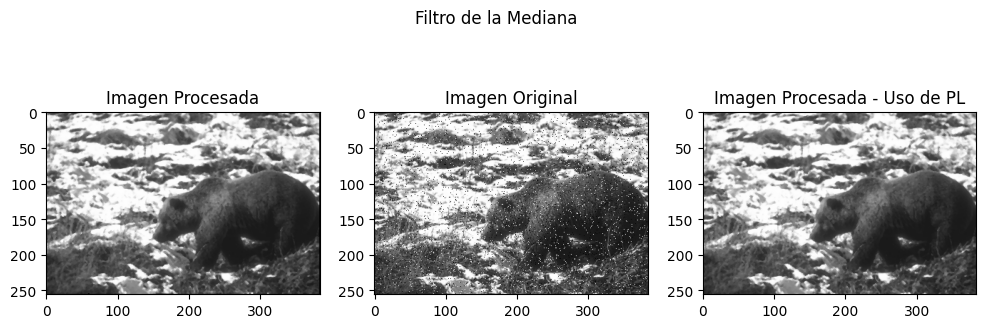

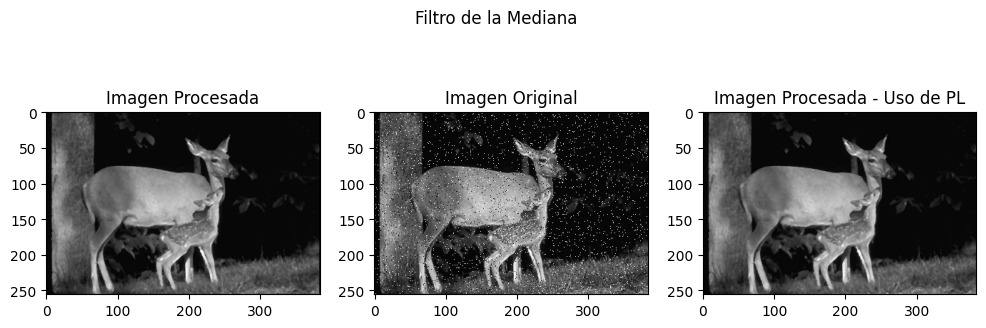

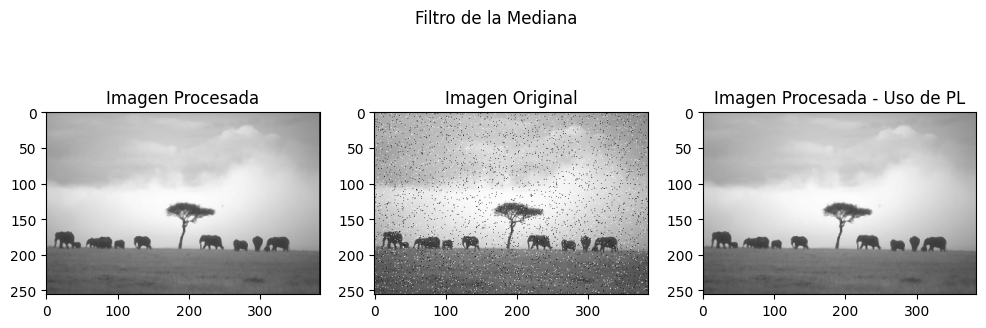

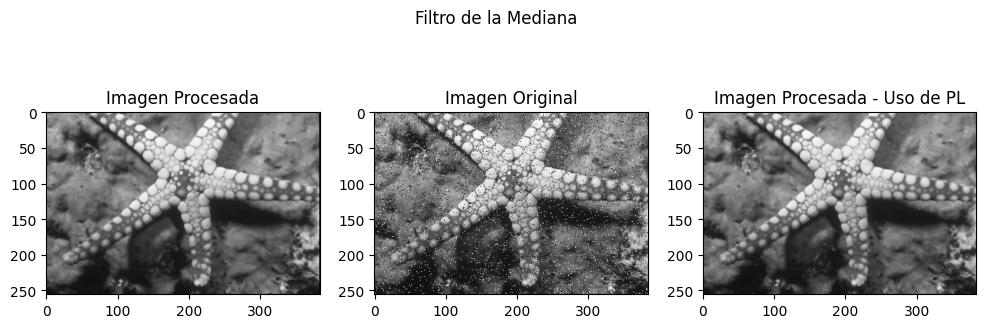

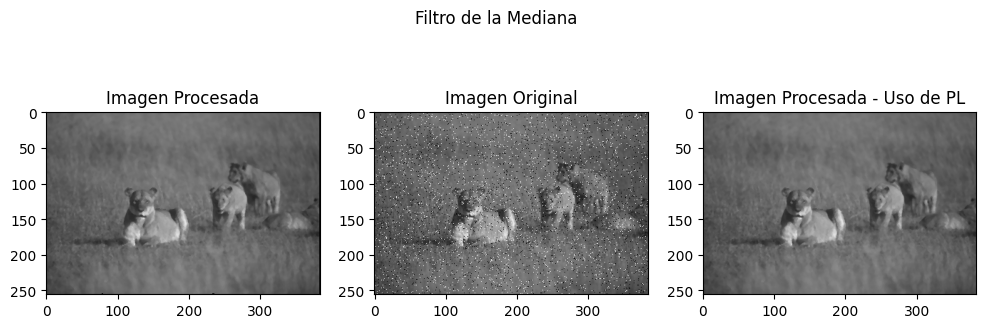

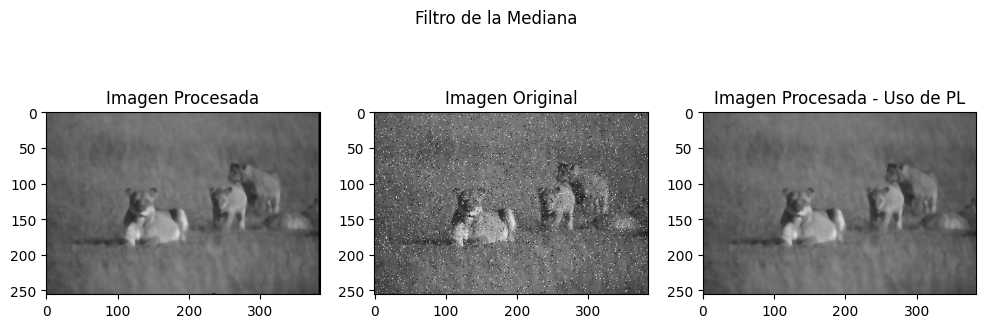

In [3]:
# Se puede modificar el parámetro del tamaño del filtro
tamanio_filtro = 3

Filtro_Mediana("img-filtro-mediana/1.png", tamanio_filtro)
Filtro_Mediana("img-filtro-mediana/2.png", tamanio_filtro)
Filtro_Mediana("img-filtro-mediana/3.png", tamanio_filtro)
Filtro_Mediana("img-filtro-mediana/4.png", tamanio_filtro)
Filtro_Mediana("img-filtro-mediana/5.png", tamanio_filtro)
Filtro_Mediana("img-filtro-mediana/5.png", tamanio_filtro + 2)